<a href="https://colab.research.google.com/github/preto-fisico/Dupla55-Ciencia_de_Dados/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


4: Implementação

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo carregado com sucesso!

Avaliação do Modelo (Regressão Linear):
- MAE: 0.0140
- MSE: 0.0003
- R²: 0.5026

R² (Ridge): 0.5516
R² (Lasso): -0.0037


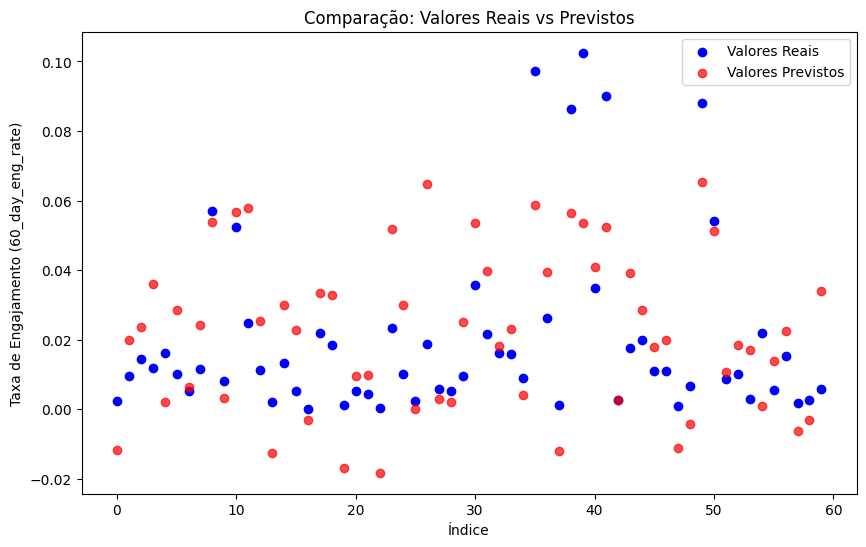

In [14]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import drive

# Montar o Google Drive no Colab
drive.mount('/content/drive')

# Carregar os dados
caminho_arquivo = '/content/drive/My Drive/projetounidade9/tabela_influenciadores.csv'

try:
    df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')
    print("Arquivo carregado com sucesso!")
except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado no caminho especificado: {caminho_arquivo}")
except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")

# Função para ajustar os dados (conversão de sufixos como k, m, b)
def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    try:
        return float(value)
    except ValueError:
        return value

columns_to_convert = ['avg_likes', 'new_post_avg_like', '60_day_eng_rate', 'followers', 'influence_score']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_number)

# Remover valores nulos
df.dropna(subset=['60_day_eng_rate'], inplace=True)

# Transformação Logarítmica
df['avg_likes_log'] = np.log1p(df['avg_likes'])
df['new_post_avg_like_log'] = np.log1p(df['new_post_avg_like'])
df['followers_log'] = np.log1p(df['followers'])
df['influence_score_log'] = np.log1p(df['influence_score'])

# Normalização
scaler = MinMaxScaler()
df[['avg_likes_log_norm', 'new_post_avg_like_log_norm', 'followers_log_norm', 'influence_score_log_norm']] = scaler.fit_transform(
    df[['avg_likes_log', 'new_post_avg_like_log', 'followers_log', 'influence_score_log']]
)

# Divisão dos dados (70% Treinamento, 30% Teste)
X = df[['avg_likes_log_norm', 'new_post_avg_like_log_norm', 'followers_log_norm', 'influence_score_log_norm']]
y = df['60_day_eng_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação do modelo de regressão linear
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nAvaliação do Modelo (Regressão Linear):")
print(f"- MAE: {mae:.4f}")
print(f"- MSE: {mse:.4f}")
print(f"- R²: {r2:.4f}")

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"\nR² (Ridge): {ridge_r2:.4f}")

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"R² (Lasso): {lasso_r2:.4f}")

# Gráfico: Comparação de valores reais e previstos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Valores Reais', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Valores Previstos', color='red', alpha=0.7)
plt.legend()
plt.title("Comparação: Valores Reais vs Previstos")
plt.xlabel("Índice")
plt.ylabel("Taxa de Engajamento (60_day_eng_rate)")
plt.show()
